<a href="https://colab.research.google.com/github/HHansi/Machine-Learning-CPD-Course/blob/activities/Activities/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem

**Can we predict the floor area of a house based on its appliances using a simple linear regression model?**

1.   Load home_appliance.csv into a DataFrame.
2.   Clean and visualise data using appropriate techniques.
3.   Recognise the best features to train a simple linear regression model.
4.   Build model(s) and evaluate their performance.
5.   Report your findings.

## Description of the Data Set


home_appliance.csv data set consists of 6 columns describing the appliances in each house.

*   homeid - unique id assigned to each home
*   food - number of food appliances
*   water - number of water appliances
*   heating - number of heating appliances
*   other - number of other appliances
*   floorarea - total floor area of the home covering all rooms


(This data set is taken from [IDEAL Household Energy Dataset](https://datashare.ed.ac.uk/handle/10283/3647).)

# Libraries

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define random state
random_state = 1234

# Load Data

In [ ]:
# Load the data set
df = pd.read_csv("https://raw.githubusercontent.com/HHansi/Machine-Learning-CPD-Course/main/Data/home_appliance.csv")
df.head(5)

,homeid,food,water,heating,other,floorarea
0,47,9,5,0,0,427.0
1,55,11,2,0,0,NaN
2,59,10,0,0,0,760.0
3,61,9,6,1,1,685.0
4,62,15,5,0,1,815.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   homeid     256 non-null    int64  
 1   food       256 non-null    int64  
 2   water      256 non-null    int64  
 3   heating    256 non-null    int64  
 4   other      256 non-null    int64  
 5   floorarea  255 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 12.1 KB


In [ ]:
# Find if the data set contains Null/NaN values
df.isna().sum()

homeid       0
food         0
water        0
heating      0
other        0
floorarea    1
dtype: int64

# Data Cleaning

In [ ]:
# remove rows and columns with Null/NaN values.
cleaned_df = df.dropna()
print(cleaned_df.shape)
cleaned_df.head(5)

(255, 6)


,homeid,food,water,heating,other,floorarea
0,47,9,5,0,0,427.0
2,59,10,0,0,0,760.0
3,61,9,6,1,1,685.0
4,62,15,5,0,1,815.0
5,63,11,5,1,1,725.0


In [ ]:
cleaned_df.describe()

,homeid,food,water,heating,other,floorarea
count,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000
mean,198.901961,11.282353,6.364706,0.388235,0.298039,848.360784
std,80.249918,2.317063,1.895999,0.563191,0.920777,291.104459
min,47.000000,5.000000,0.000000,0.000000,0.000000,325.000000
25%,133.500000,10.000000,5.000000,0.000000,0.000000,645.000000
50%,201.000000,11.000000,6.000000,0.000000,0.000000,805.000000
75%,267.500000,13.000000,7.000000,1.000000,0.000000,1007.500000
max,335.000000,22.000000,14.000000,3.000000,7.000000,1865.000000


As seen in the above output, we have data from different value ranges (e.g. food 5-22, floorarea 325-1865).

Thus, we need to scale the values, to support the learning process. 

In [ ]:
# Scale data using StandardScaler
scaler = StandardScaler().fit(cleaned_df)
scaled_data = scaler.transform(cleaned_df)

# Print the output of first 5 rows
scaled_data[:5]

array([[-1.89658369, -0.98695683, -0.72119744, -0.69070515, -0.32431875,
        -1.45030214],
       [-1.74675676, -0.55452729, -3.36351567, -0.69070515, -0.32431875,
        -0.30413327],
       [-1.72178561, -0.98695683, -0.1927338 ,  1.08838387,  0.76385599,
        -0.56227941],
       [-1.70930003,  1.60762041, -0.72119744, -0.69070515,  0.76385599,
        -0.1148261 ],
       [-1.69681445, -0.12209775, -0.72119744,  1.08838387,  0.76385599,
        -0.42460147]])

Separate the data set into two partitions: (1) train and (2) test.

In [ ]:
'''
Randomly split data into train(75%) and test(15%) using sklearn train_test_split function.
random_state controls the shuffling applied to the data and is used to reproduce the outputs.
'''
train, test = train_test_split(scaled_data, test_size=0.15, random_state=random_state)

# Print the size of datasets and few initial samples
print(f'Train set size: {train.shape}')
print(f'Train set sample: \n {train[:5]}')

print(f'Test set size: {test.shape}')
print(f'Test set sample: \n {test[:5]}')

Train set size: (216, 6)
Train set sample: 
 [[ 1.07498374  0.31033179  0.33572984 -0.69070515 -0.32431875 -0.90647427]
 [ 0.53810391  1.17519087  0.33572984 -0.69070515  1.85203074  1.27916306]
 [ 1.33718086 -0.98695683 -0.72119744 -0.69070515 -0.32431875 -0.20087482]
 [ 0.52561833 -0.98695683 -0.72119744 -0.69070515 -0.32431875 -1.68091269]
 [-1.22236251 -0.55452729 -1.24966109 -0.69070515 -0.32431875 -0.13203585]]
Test set size: (39, 6)
Test set sample: 
 [[ 1.22407622e-03  1.17519087e+00 -1.92733800e-01  2.86747288e+00
  -3.24318746e-01  9.86597431e-01]
 [ 1.57440683e+00  1.17519087e+00  2.44958442e+00  1.08838387e+00
  -3.24318746e-01  1.95034302e+00]
 [-1.01010770e+00 -1.22097752e-01 -7.21197444e-01 -6.90705146e-01
  -3.24318746e-01 -6.31968748e-02]
 [-1.67184330e+00 -5.54527292e-01 -1.24966109e+00 -6.90705146e-01
   2.94020548e+00  5.21934378e-01]
 [-3.48372092e-01 -5.54527292e-01 -1.92733800e-01  1.08838387e+00
   1.85203074e+00 -4.07391729e-01]]


# EDA

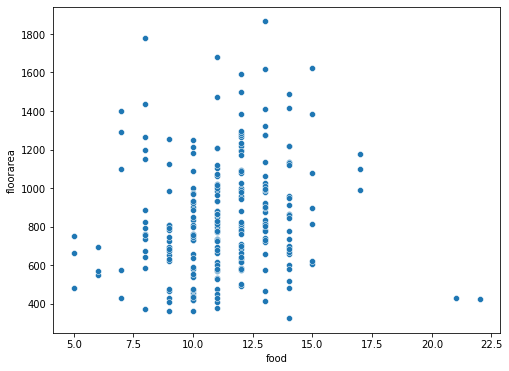

In [ ]:
fig = plt.figure(figsize=(8, 6))
sns.scatterplot(data=cleaned_df, x='food', y='floorarea')

plt.show()

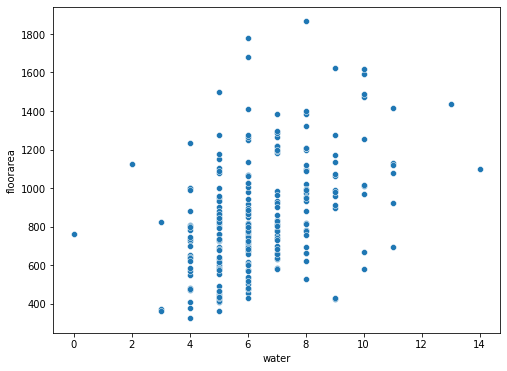

In [ ]:
fig = plt.figure(figsize=(8, 6))
sns.scatterplot(data=cleaned_df, x='water', y='floorarea')

plt.show()

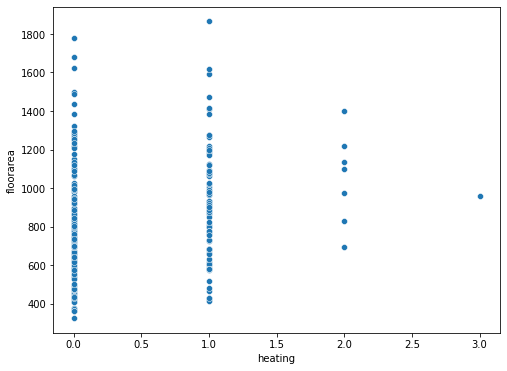

In [ ]:
fig = plt.figure(figsize=(8, 6))
sns.scatterplot(data=cleaned_df, x='heating', y='floorarea')

plt.show()

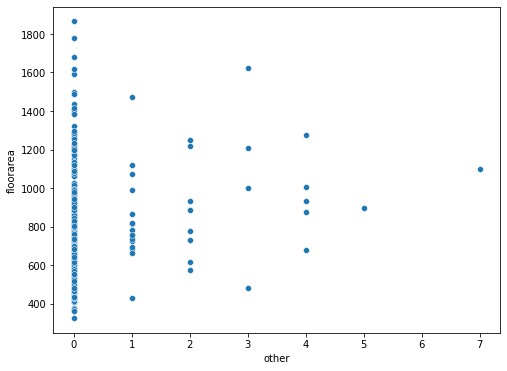

In [ ]:
fig = plt.figure(figsize=(8, 6))
sns.scatterplot(data=cleaned_df, x='other', y='floorarea')

plt.show()

# Linear Regression

As the variable/ feature for a simple linear regression model to predict floor area, we can use either the count of food appliances or water appliances in the house. Since most of the houses do not have heating or other appliances, their count will not be helpful for the model.

## Model 1
* x = food
* y = floorarea

In [ ]:
x = train[:, 1]  # get food appliance count from train data
y = train[:, 5]  # get floorarea from train data

x = x.reshape(-1, 1)  # format to shape (n_samples, n_features)
y = y.reshape(-1, 1)  # format to shape (n_samples, n_targets)

regr = LinearRegression()  # create an instance of the class LinearRegression  
regr.fit(x, y)  # train model 

# print coefficient(s)
print(f'Coefficients: {regr.coef_}')

# print intercept
print(f'intercept: {regr.intercept_}')

Coefficients: [[0.07935413]]
intercept: [-0.01384676]


In [ ]:
# make predictions on test data
test_x = test[:, 1].reshape(-1, 1)  # get food appliance count from test set and format

y_pred = regr.predict(test_x)  # make predictions

test_y = test[:, 5].reshape(-1, 1)  # get floorarea from test set to compare with predictions

# calcuate mean squared error
error = mean_squared_error(test_y, y_pred)
print(f'Mean squared error: {error:.2f}')

Mean squared error: 0.85


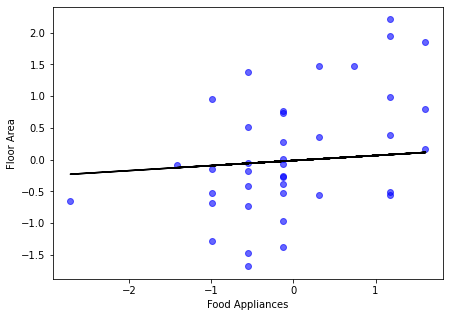

In [ ]:
fig = plt.figure(figsize=(7, 5))

# plot data points
plt.scatter(test_x, test_y, color ='b', alpha=0.6)
# plot regression line
plt.plot(test_x, y_pred, color ='k')

plt.xlabel("Food Appliances")
plt.ylabel("Floor Area")
  
plt.show()

## Model2
* x = water
* y = floorarea

In [ ]:
x = train[:, 2]  # get water appliance count from train data
y = train[:, 5]  # get floorarea from train data

x = x.reshape(-1, 1)  # format to shape (n_samples, n_features)
y = y.reshape(-1, 1)  # format to shape (n_samples, n_targets)

regr = LinearRegression()  # create an instance of the class LinearRegression  
regr.fit(x, y)  # train model 

# print coefficient(s)
print(f'Coefficients: {regr.coef_}')

# print intercept
print(f'intercept: {regr.intercept_}')

Coefficients: [[0.44025994]]
intercept: [-0.02868897]


In [ ]:
# make predictions on test data
test_x = test[:, 2].reshape(-1, 1)  # get water appliance count from test set and format

y_pred = regr.predict(test_x)  # make predictions

test_y = test[:, 5].reshape(-1, 1)  # get floorarea from test set to compare with predictions

# calcuate mean squared error
error = mean_squared_error(test_y, y_pred)
print(f'Mean squared error: {error:.2f}')

Mean squared error: 0.76


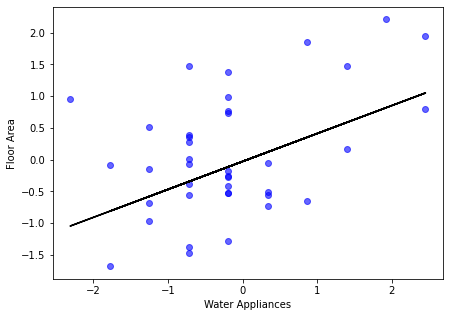

In [ ]:
fig = plt.figure(figsize=(7, 5))

# plot data points
plt.scatter(test_x, test_y, color ='b', alpha=0.6)
# plot regression line
plt.plot(test_x, y_pred, color ='k')

plt.xlabel("Water Appliances")
plt.ylabel("Floor Area")
  
plt.show()